# Discretization

## Introduction

- Discretization involves transforming continuous data (such as real-valued numbers) into discrete categories.
- Instead of dealing with exact numeric values, we group them into predefined bins or intervals.

## Why Discretization?

- Some machine learning algorithms prefer or perform better when input variables have a **standard probability distribution**.
- Continuous data with **non-standard distributions** (e.g., skewed, exponential, or multi-modal) can pose challenges for modeling.
- Discretization helps prepare data for algorithms that require **discrete or categorical input**.

## Methods of Discretization

1. **Uniform Discretization**: Divides the data into equal-width intervals.
2. **Quantile Discretization**: Divides the data into quantiles.
3. **Entropy-based Discretization**: Divides the data based on information gain.
4. **K-means Discretization**: Divides the data into k clusters.
5. **Decision Tree Discretization**: Discretizes data using decision trees.

## Effect of Discretization


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import mglearn

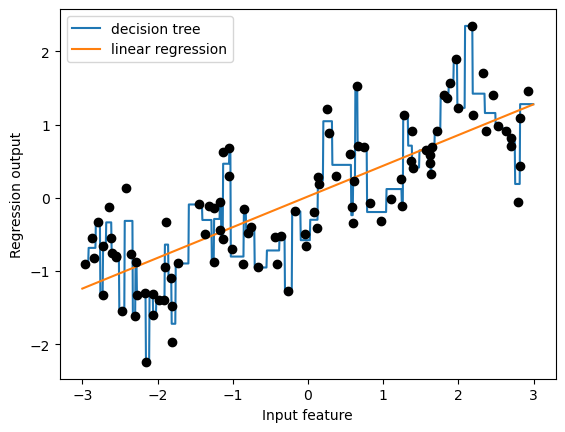

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

In [3]:
bins = np.linspace(-3, 3, 11)
print("bins: {}".format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [4]:
which_bin = np.digitize(X, bins=bins)
print("\nData points:\n", X[:5])
print("\nBin membership for data points:\n", which_bin[:5])


Data points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Bin membership for data points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


- Transforming the single continuous input feature in the dataset into a categorical feature that encodes which bin the data point falls into.

In [5]:
from sklearn.preprocessing import OneHotEncoder
# transform using the OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder.fit finds the unique values that appear in which_bin
encoder.fit(which_bin)
# transform creates the one-hot encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


/Users/chiyeong/anaconda3/envs/study-machine-learning/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [6]:
print("X_binned.shape: {}".format(X_binned.shape))

X_binned.shape: (100, 10)


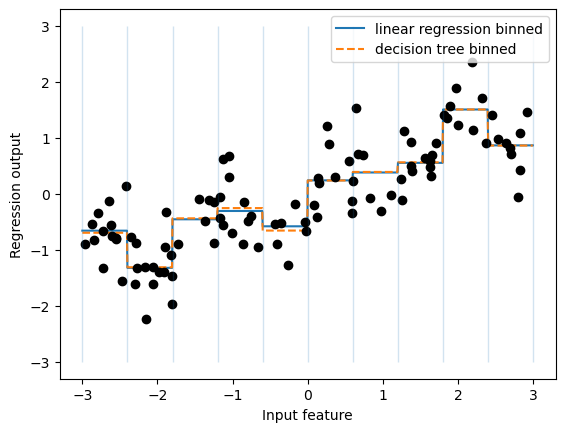

In [8]:
line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned', linestyle='dashed')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")

- Linear Model and the Decision tree make almost same predictions.

Comparing before and after:
- Linear model get much more flexible.
- Decision tree get much less flexible.